In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('classic')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import os
import cv2
from PIL import Image
import numpy as np
import sklearn 
   
  

Using TensorFlow backend.


In [5]:
image_directory = 'E:/organoid_binary_classifer/'
SIZE = 512
dataset = []  
  
label = []  


irregular_images = os.listdir(image_directory + 'irregular_trail_2/')
for i, image_name in enumerate(irregular_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = cv2.imread(image_directory + 'irregular_trail_2/' + image_name, cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image = np.array(image)
        image = np.expand_dims(image, axis = -1)
        dataset.append(np.array(image))
        label.append(0)
#Iterate through all images in Uninfected folder, resize to 64 x 64\n#Then save into the same numpy array 'dataset' but with label 1

spherical_images = os.listdir(image_directory + 'spherical_trail_2/')
for i, image_name in enumerate(spherical_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'spherical_trail_2/' + image_name, cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image = np.array(image)
        image = np.expand_dims(image, axis = -1)
        dataset.append(np.array(image))
        label.append(1)

dataset = np.array(dataset)
label = np.array(label)

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [15]:
len(X_test)

243

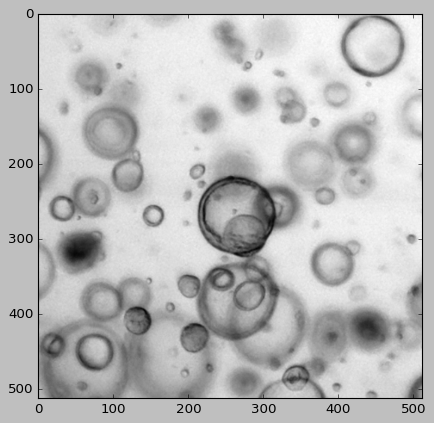

In [6]:
plt.imshow(X_train[100], cmap = 'gray')

In [4]:
#data augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import time

#create image data augmentation generator

datagen = ImageDataGenerator(brightness_range=[0.2,0.5],
                             rotation_range = 90,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True)
X_train_augmented = X_train
y_train_augmented = y_train

# 1 round of augmentation:
start_time = time.time()
for j in [1,2,3,4,5]:
    print('Augmentation round: ' + str(j))
    for i, image in enumerate(X_train):
        organoid_type = y_train[i]
        image_expanded = np.expand_dims(image, axis=0)
        it = datagen.flow(image_expanded, batch_size=1)
        # generate augmented image
        batch = it.next()
        # convert to unsigned integers for viewing
        augmented_image = batch[0].astype('uint8')
        augmented_image = np.expand_dims(augmented_image, axis=0)
        X_train_augmented = np.concatenate([X_train_augmented,augmented_image],axis=0)
        y_train_augmented = np.append(y_train_augmented, organoid_type)
        
 

Augmentation round: 1
Augmentation round: 2
Augmentation round: 3
Augmentation round: 4
Augmentation round: 5


In [5]:
len(X_train_augmented)

5814

In [6]:
from keras.utils import normalize

X_train_normalized_augmented = normalize(X_train_augmented, axis=1)
X_test_normalized = normalize(X_test, axis=1)

#X_train_normalized = normalize(X_train, axis=1)
#X_test_normalized = normalize(X_test, axis=1)

In [2]:
from keras.callbacks import ModelCheckpoint

# specify the path where you want to save your models
filepath = "E:/organoid_binary_classifer/organoid_binary_classifer_004_50epochs_1aug_05dropout_{epoch}.hdf5"

# create a model checkpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto', period=1)

INPUT_SHAPE = (512, 512, 1)

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# print(model.summary())
# history = model.fit(X_train_normalized_augmented, 
#                     y_train_augmented,
#                     batch_size = 64, 
#                     verbose = 1, 
#                     epochs = 100,
#                     validation_data=(X_test_normalized,y_test),
#                     shuffle = False,
#                    callbacks=[checkpoint])
# model.save('E:/organoid_binary_classifer/organoid_binary_classifer_004_50epochs_1aug_05dropout.h5') 

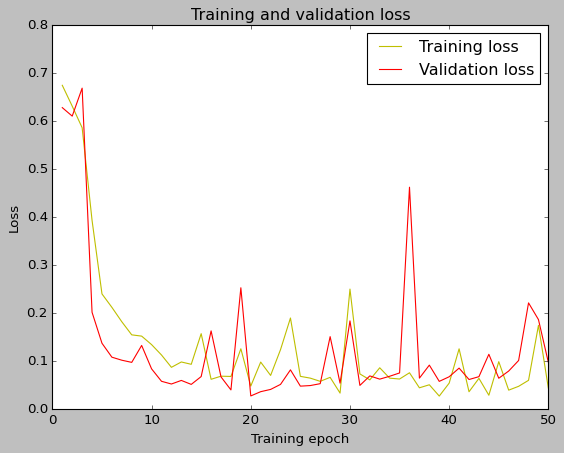

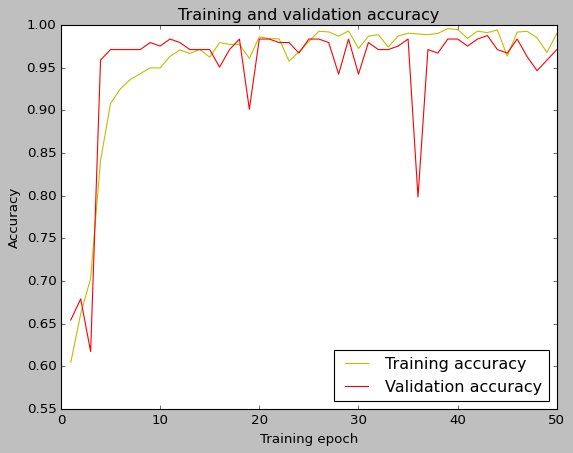

In [24]:
#plot the training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Training epoch')
plt.xlim(0,50)
plt.ylabel('Loss')
plt.ylim(0,0.8)
plt.legend(loc = 'upper right')
plt.savesif()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Training epoch')
plt.xlim(0,50)
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()



In [9]:
# inference pipeline

INPUT_SHAPE = (512, 512, 1)

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

print(model.summary())

from keras.utils import normalize
import random

X_test_normalized = normalize(X_test, axis=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 510, 510, 16)      160       
_________________________________________________________________
activation_1 (Activation)    (None, 510, 510, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 255, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 253, 253, 32)      4640      
_________________________________________________________________
activation_2 (Activation)    (None, 253, 253, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 64)     

NameError: name 'X_test_normalized' is not defined

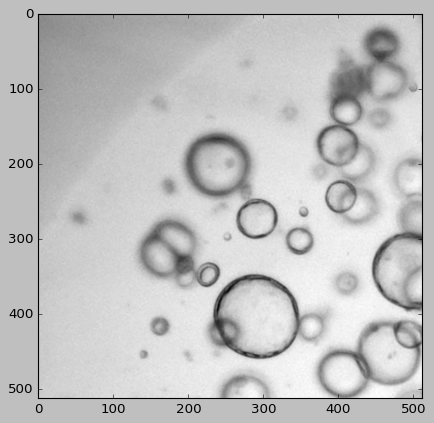

In [7]:
# 0 irregular
# 1 spherical
import random
n = random.randint(0,145)
#Select the index of image to be loaded for testing

plt.imshow(X_test[n],cmap ='gray')

img_to_predict = X_test_normalized[n]
input_img = np.expand_dims(img_to_predict, axis=0) 
#Expand dims so the input is (num images, x, y, c)

model.load_weights(r'E:\organoid_binary_classifer\organoid_binary_classifer_004_50epochs_1aug_05dropout_20.hdf5')

prediction = model.predict(input_img)
print("The prediction for this image is:", prediction , ' meaning ', np.round(model.predict(input_img)))
print("The actual label for this image is:", y_test[n])



In [38]:
#We can load the trained model, so we don't have to train again for 300 epochs!
from keras.models import load_model

acc = model.evaluate(X_test_normalized, y_test)
print(acc)
#print("Accuracy = ", (acc * 100.0))

243/243 [==============================] - 1s 3ms/step
[0.027204033274801424, 0.9835391044616699]


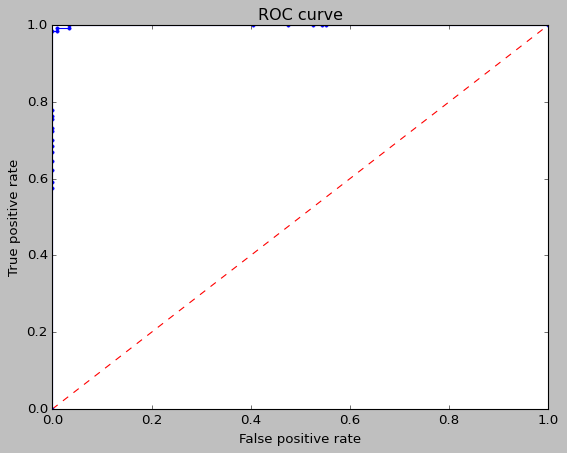

[2.0000000e+00 1.0000000e+00 9.9999994e-01 9.9999988e-01 9.9999976e-01
 9.9999923e-01 9.9999905e-01 9.9999851e-01 9.9999833e-01 9.9999827e-01
 9.9999821e-01 9.9999809e-01 9.9999779e-01 9.4571352e-01 8.2842886e-01
 7.8684425e-01 5.3768879e-01 5.3439742e-01 1.5497208e-06 1.4901161e-07
 8.9406967e-08 5.9604645e-08 2.9802322e-08 0.0000000e+00]


In [39]:
#Check the confusion matrix for various thresholds.
#Which one is good?\n#Need to balance positive, negative, false positive and false negative. \

#ROC can help identify the right threshold.
#Receiver Operating Characteristic (ROC) Curve is a plot that helps us \nvisualize the performance of a binary classifier
#when the threshold is varied. 
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test_normalized).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

print(thresholds)

In [40]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  

#Locate the point where the value is close to 0
print("Ideal threshold is:", ideal_roc_thresh['thresholds']) 


Ideal threshold is: 15    0.786844
Name: thresholds, dtype: float32


In [2]:
ideal_threshold = 0.786844

In [42]:
#AUC
#Area under the curve (AUC) for ROC plot can be used to understand hpw well a classifier is performing. \
#% chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC =", auc_value)


Area under curve, AUC = 0.9996606027694813


In [6]:
import glob
from keras.utils import normalize
# 0 irregular
# 1 spherical


model.load_weights(r'E:\organoid_binary_classifer\organoid_binary_classifer_004_50epochs_1aug_05dropout_20.hdf5')
ideal_threshold = 0.786844

from sklearn import feature_extraction
image_paths = [x for x in glob.glob(r"C:\Users\Standard User\Downloads\test\*.png")]

for image in image_paths:
    image_to_test = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    images_to_test = feature_extraction.image.extract_patches_2d(image_to_test, (512,512), max_patches=1000, random_state=None)
    images_to_test = [np.expand_dims(x, axis = -1) for x in images_to_test]
    images_to_test = normalize(images_to_test, axis=1)
    
    if np.mean(model.predict(images_to_test)) < ideal_threshold:
        print('Morphology prediction for ', (os.path.basename(image)), ': irregular')
    if np.mean(model.predict(images_to_test)) > ideal_threshold:
        print('Morphology prediction for ', (os.path.basename(image)), ': spherical')


Morphology prediction for  output.png : spherical


In [10]:
from sklearn import feature_extraction
image_to_test = cv2.imread(r'C:\Users\Standard User\Downloads\Spherical\76H_W4.tif', cv2.IMREAD_GRAYSCALE)
images_to_test = feature_extraction.image.extract_patches_2d(image_to_test, (512,512), max_patches=5000, random_state=None)
images_to_test = [np.expand_dims(x, axis = -1) for x in images_to_test]
images_to_test = normalize(images_to_test, axis=1)

value = np.mean(model.predict(images_to_test))
print('Prediction value: ', str(value) )
if value < ideal_threshold:
    
    print('Morphology prediction : irregular')
if value > ideal_threshold:
    print('Morphology prediction : spherical')


Prediction value:  0.5078585
Morphology prediction : irregular
